# A/B Testing Analysis for Marketing Campaign

This notebook performs an A/B test analysis on the `marketing_AB.csv` dataset to evaluate the effectiveness of a new marketing campaign (group 'ad') against a public service announcement (group 'psa').

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
sns.set(style="whitegrid")

## 1. Data Loading and Preprocessing

In [13]:
# Load the dataset
# df = pd.read_csv('marketing_AB.csv')
df = pd.read_csv('/content/sample_data/marketing_AB.csv')

# Rename 'test group' to 'group' if it exists
if 'test group' in df.columns:
    df.rename(columns={'test group': 'group'}, inplace=True)
    print("Renamed 'test group' column to 'group'.")

# Convert 'converted' column to integer (0 or 1)
df['converted'] = df['converted'].astype(int)
print("Converted 'converted' column to integer type.")

print("DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Renamed 'test group' column to 'group'.
Converted 'converted' column to integer type.
DataFrame Head:
   Unnamed: 0  user id group  converted  total ads most ads day  most ads hour
0           0  1069124    ad          0        130       Monday             20
1           1  1119715    ad          0         93      Tuesday             22
2           2  1144181    ad          0         21      Tuesday             18
3           3  1435133    ad          0        355      Tuesday             10
4           4  1015700    ad          0        276       Friday             14

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   group          588101 non-null  object
 3   converted      588101 non-null  int64 
 4   total ads      588101 non-nu

# New Section

## 2. Conversion Rate Calculation

In [14]:
# Calculate conversion rates for each group
conversion_rates = df.groupby('group')['converted'].mean() * 100
print("Conversion Rates:")
print(conversion_rates)

Conversion Rates:
group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64


## 3. Visualization

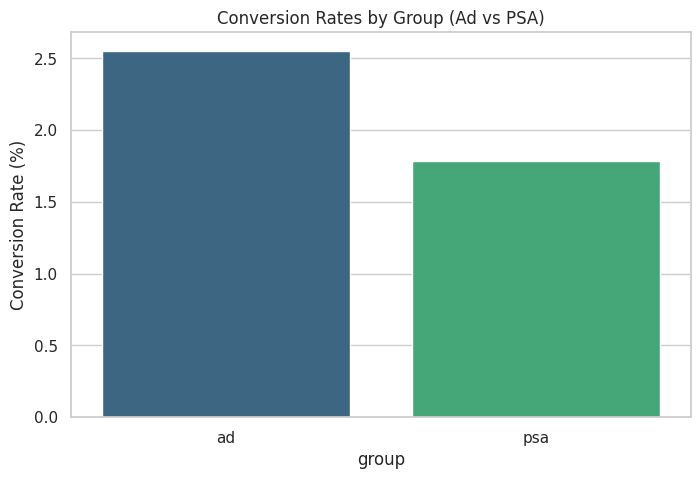

In [15]:
# Plot conversion rates
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, hue=conversion_rates.index, palette='viridis', legend=False)
plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rates by Group (Ad vs PSA)")
plt.show()

## 4. Hypothesis Testing (Two-sample t-test)

In [16]:
# Define control and treatment groups
control_group = df[df['group'] == 'psa']['converted']
treatment_group = df[df['group'] == 'ad']['converted']

# Perform two-sample t-test
if len(control_group) > 1 and len(treatment_group) > 1:
    t_stat, p_val = stats.ttest_ind(treatment_group, control_group)
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.4f}")

    print("\nInterpretation")
    print("- Null Hypothesis (H0): No difference in conversion between 'ad' and 'psa' groups.")
    print("- Alternative Hypothesis (H1): The 'ad' campaign has a different conversion rate than 'psa'.")

    if p_val < 0.05:
        print("\nConclusion: P-value < 0.05. Reject Null Hypothesis. The 'ad' campaign had a statistically significant impact on conversions compared to 'psa'.")
    else:
        print("\nConclusion: P-value >= 0.05. Fail to Reject Null Hypothesis. The 'ad' campaign did not have a statistically significant impact on conversions compared to 'psa'.")
else:
    print("Not enough samples in one or both groups to perform a t-test. Check group sizes.")

T-statistic: 7.3704
P-value: 0.0000

Interpretation
- Null Hypothesis (H0): No difference in conversion between 'ad' and 'psa' groups.
- Alternative Hypothesis (H1): The 'ad' campaign has a different conversion rate than 'psa'.

Conclusion: P-value < 0.05. Reject Null Hypothesis. The 'ad' campaign had a statistically significant impact on conversions compared to 'psa'.


## 5. Key Insights

In [17]:
print("Based on the analysis:")
if 'ad' in conversion_rates.index and 'psa' in conversion_rates.index:
    ad_rate = conversion_rates['ad']
    psa_rate = conversion_rates['psa']
    uplift = ad_rate - psa_rate
    print(f"- The 'ad' group had a conversion rate of {ad_rate:.2f}% compared to the 'psa' group's {psa_rate:.2f}%.")
    print(f"- This represents an uplift of {uplift:.2f}% for the 'ad' campaign.")
    if 'p_val' in locals() and p_val < 0.05:
        print("- The observed difference is statistically significant, indicating the 'ad' campaign is more effective.")
    else:
        print("- The observed difference is not statistically significant.")
else:
    print("- Could not calculate uplift as 'ad' or 'psa' groups were not found.")

Based on the analysis:
- The 'ad' group had a conversion rate of 2.55% compared to the 'psa' group's 1.79%.
- This represents an uplift of 0.77% for the 'ad' campaign.
- The observed difference is statistically significant, indicating the 'ad' campaign is more effective.
